<a href="https://colab.research.google.com/github/BANZOM/Stock_Market_Price_Prediction_by_LSTM/blob/main/stocks_market_prediction_usingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# downloading and importing libraries 

!pip install -q yfinance #Download market data from Yahoo! Finance's API
!pip install fix_yahoo_finance
!pip install numpy

     |████████████████████████████████| 62 kB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# fundamental libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps

#import datetime as dt
from datetime import datetime


In [ ]:
# The tech stocks we'll use for this analysis 
# Apple, Google, Microsoft, Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Start and end time for the data to be extracted 
# end = datetime.now()
# start = datetime(end.year - 1, end.month, end.day)

start = datetime.today()-dt.timedelta(365)
end = datetime.today()

# start = '2010-01-01'
# end = '2016-12-31'


# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# DataFrame of the company 
# print("Apple: \n",AAPL)
# print("\nGoogle: \n",GOOG)
# print("\nMicrosoft: \n",MSFT)
# print("\nAmazon: \n",AMZN)

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-08-22,135.720001,136.320007,132.850006,133.220001,133.220001,50461500,AMAZON
2022-08-23,133.410004,134.990005,132.949997,133.619995,133.619995,36252100,AMAZON
2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000,AMAZON
2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300,AMAZON
2022-08-26,136.550003,137.830002,130.500000,130.750000,130.750000,53322700,AMAZON
2022-08-29,129.899994,131.949997,128.770004,129.789993,129.789993,48101600,AMAZON
2022-08-30,131.250000,132.070007,126.849998,128.729996,128.729996,49203000,AMAZON
2022-08-31,129.449997,130.589996,126.739998,126.769997,126.769997,53648700,AMAZON
2022-09-01,126.000000,128.020004,123.660004,127.820000,127.820000,56636100,AMAZON


In [ ]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.126468,160.122024,156.272341,158.268056,157.786866,8.813533e+07
std,12.646765,12.644010,12.522888,12.571876,12.538696,2.641868e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.302494,149.437500,146.515003,148.382500,147.797497,6.947065e+07
50%,159.309998,161.495003,156.445000,159.065002,158.704765,8.237185e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630119,1.002058e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.954327e+08


In [ ]:
# General info
# AAPL.info()

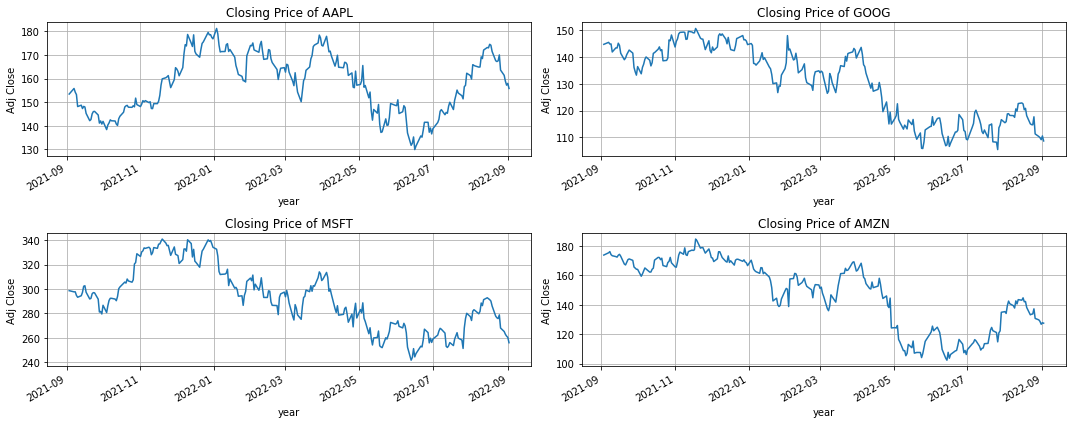

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=2, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.grid()
    plt.ylabel('Adj Close')
    plt.xlabel('year')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


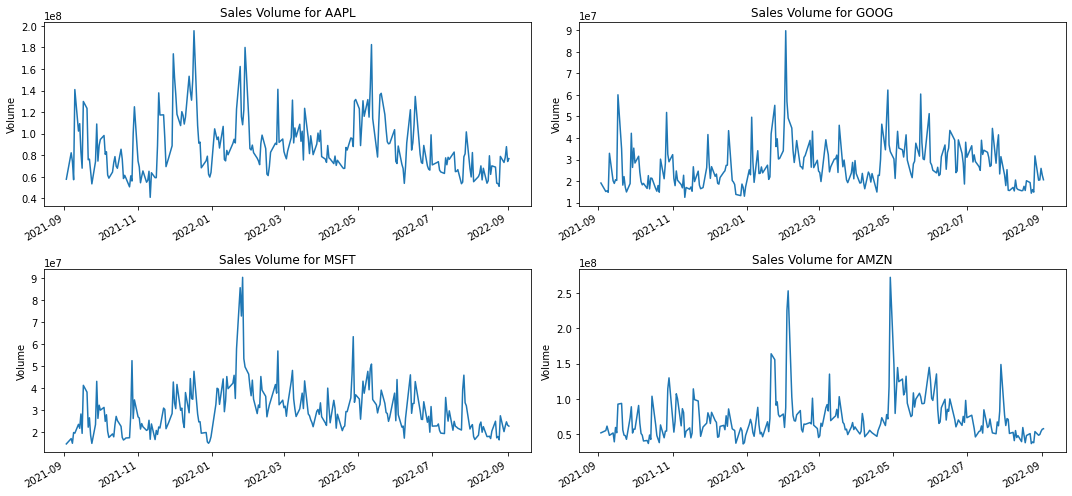

In [ ]:
# Now lets plot the total volume of stock being traded each day

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

# The below function is used to fit the above given functions in the given region
plt.tight_layout()

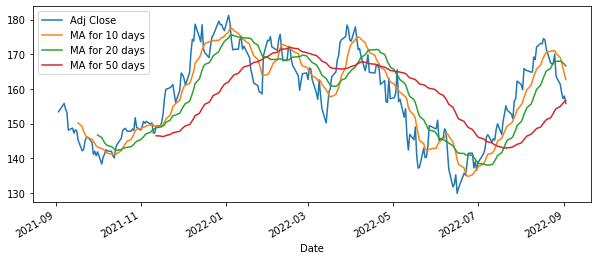

In [ ]:
# for plotting rolling averages

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = (f"MA for {ma} days")
        company[column_name] = company['Adj Close'].rolling(ma).mean()


AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

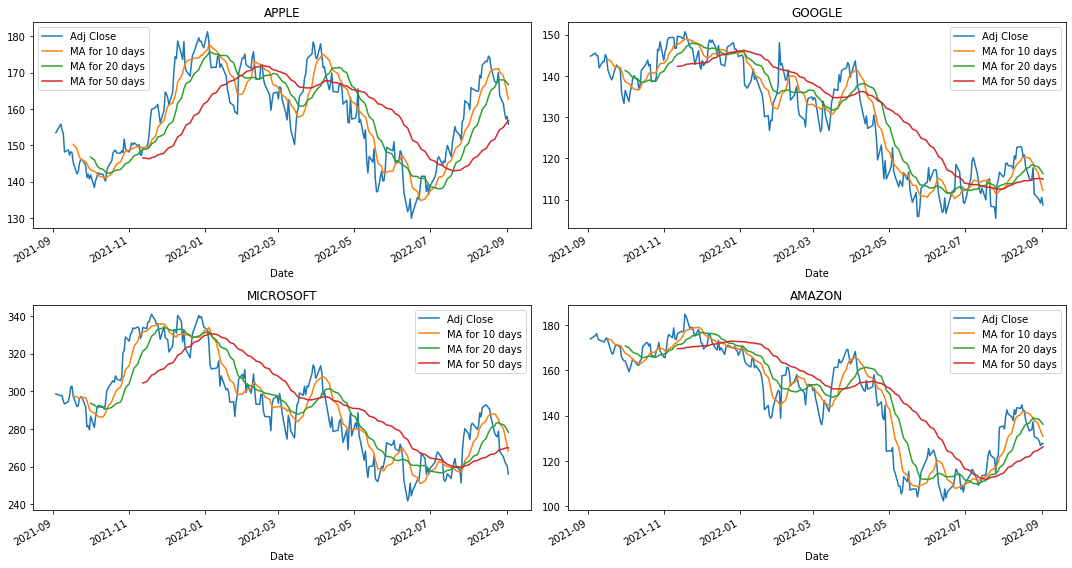

In [ ]:
#Let's assume it as a coordinate axes

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

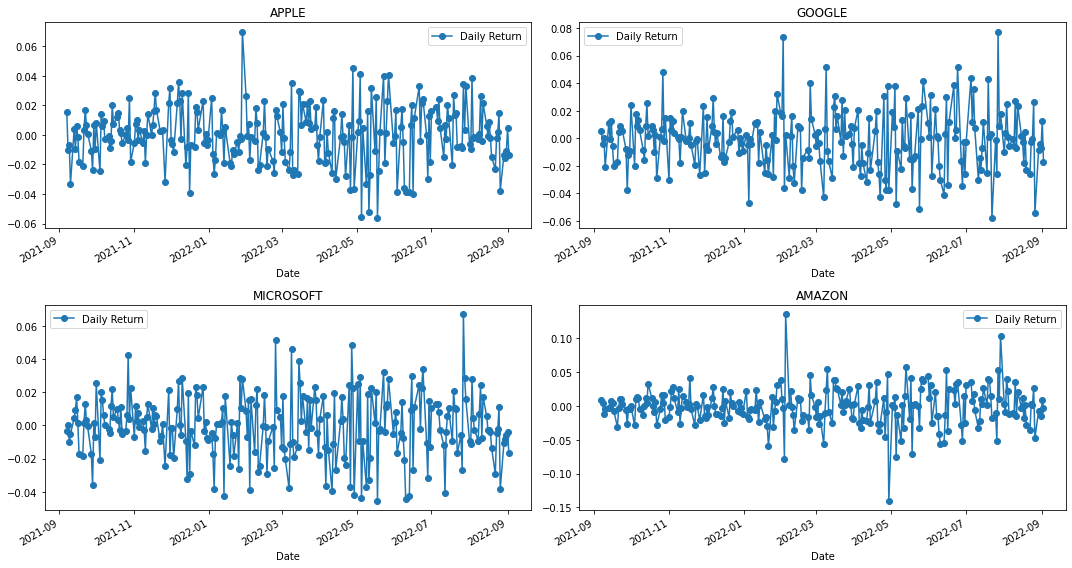

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

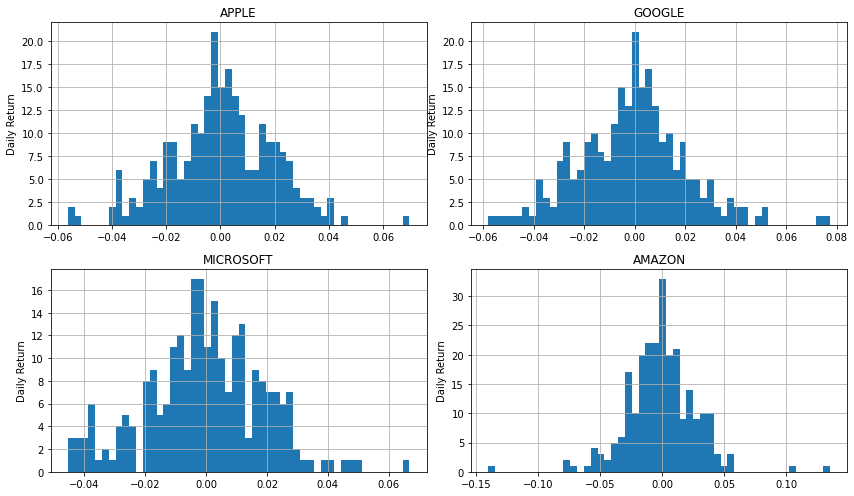

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

# closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# # Let's take a quick look
# closing_df.head() 

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

start = dt.datetime.today()-dt.timedelta(365)
end = dt.datetime.today()
#interval='1d'
closing_df = yf.download(tech_list, start=start, end=end,)['Adj Close']

# Let's take a quick look
closing_df.tail() 

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-29,161.380005,129.789993,110.339996,265.230011
2022-08-30,158.910004,128.729996,109.910004,262.970001
2022-08-31,157.220001,126.769997,109.150002,261.470001
2022-09-01,157.960007,127.820000,110.550003,260.399994
2022-09-02,155.809998,127.510002,108.680000,256.059998


In [ ]:
# Daily return
# Percentage change between the current and a prior element.: pct_change()

tech_return = closing_df.pct_change()
tech_return.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-29,-0.013690,-0.007342,-0.008625,-0.010668
2022-08-30,-0.015305,-0.008167,-0.003897,-0.008521
2022-08-31,-0.010635,-0.015226,-0.006915,-0.005704
2022-09-01,0.004707,0.008283,0.012826,-0.004092
2022-09-02,-0.013611,-0.002425,-0.016915,-0.016667


In [ ]:
''' comparing the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself. '''

" comparing the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself. "

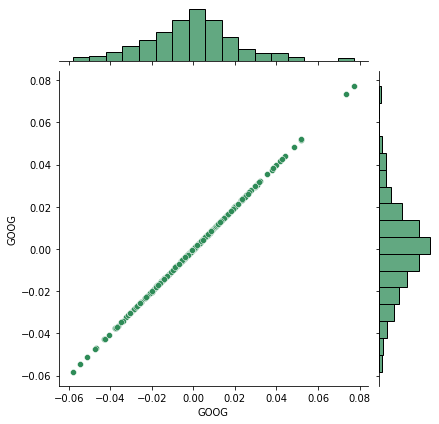

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot(x='GOOG', y='GOOG', data=tech_return, kind='scatter', color='seagreen') 

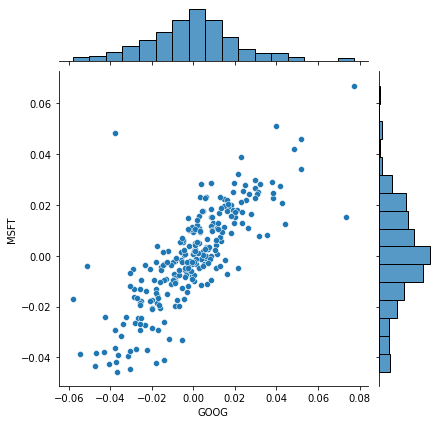

In [ ]:
# Comparing Google with Microsoft 
# we will use joinplot to compare the daily returns
 
sns.jointplot(x='GOOG', y='MSFT', data=tech_return, kind='scatter')

In [ ]:
''' we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.
    
'''

' we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.\n    \n'

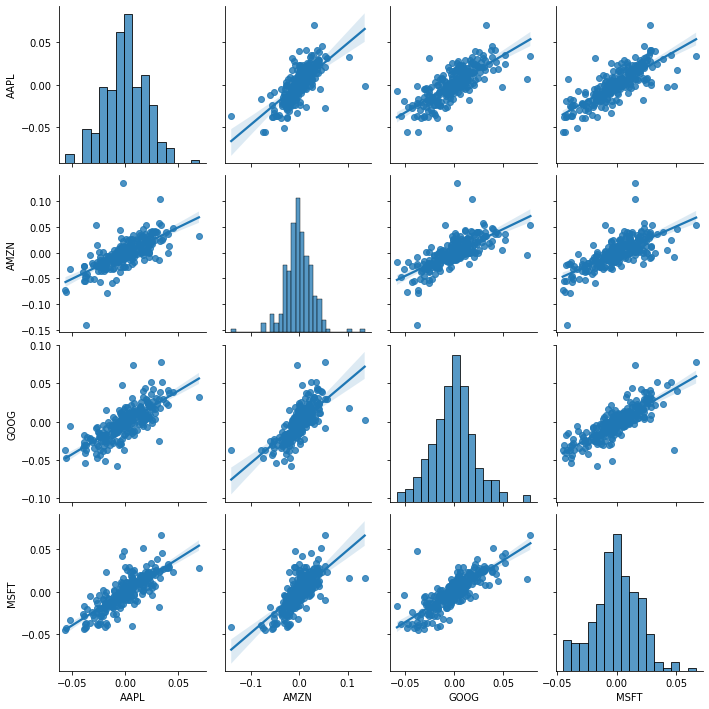

In [ ]:
#repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot
# kind = 'reg', IS FOR THE LINE DIFFERENTIATING THE DATA
# kernel density estimate (KDE)
# reg: to get that line

sns.pairplot(tech_return, kind='reg')

In [ ]:
'''we can also use sns.PairGrid() for full control of the figure,
   including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 
   Below is an example of utilizing the full power of seaborn to achieve this result.'''

'we can also use sns.PairGrid() for full control of the figure,\n   including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. \n   Below is an example of utilizing the full power of seaborn to achieve this result.'

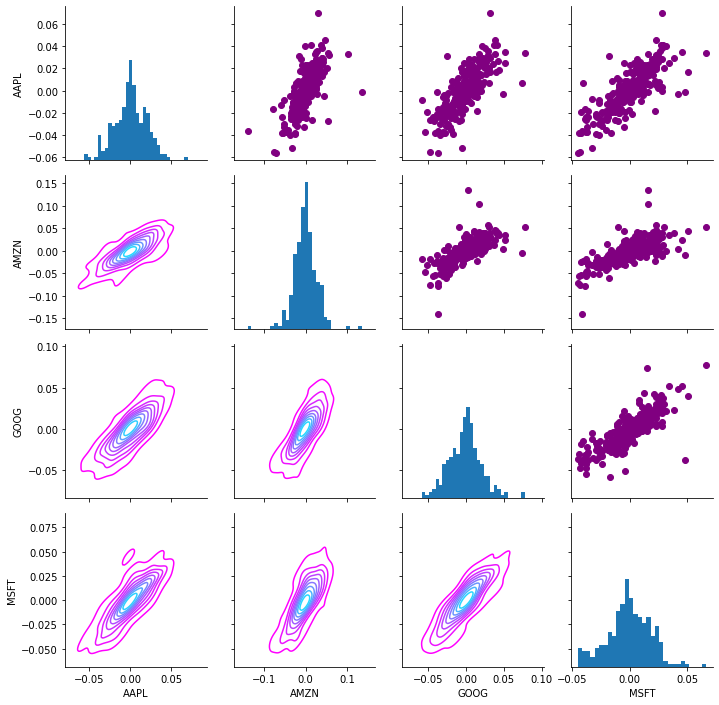

In [ ]:


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_return.dropna())

# The dropna() method removes all the rows that contains NULL values.

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [ ]:
''' NOW LETS LOOK UP INPO THE PAIR PLOTS BTWN CLOSING DFs OF COMPNAIES'''

' NOW LETS LOOK UP INPO THE PAIR PLOTS BTWN CLOSING DFs OF COMPNAIES'

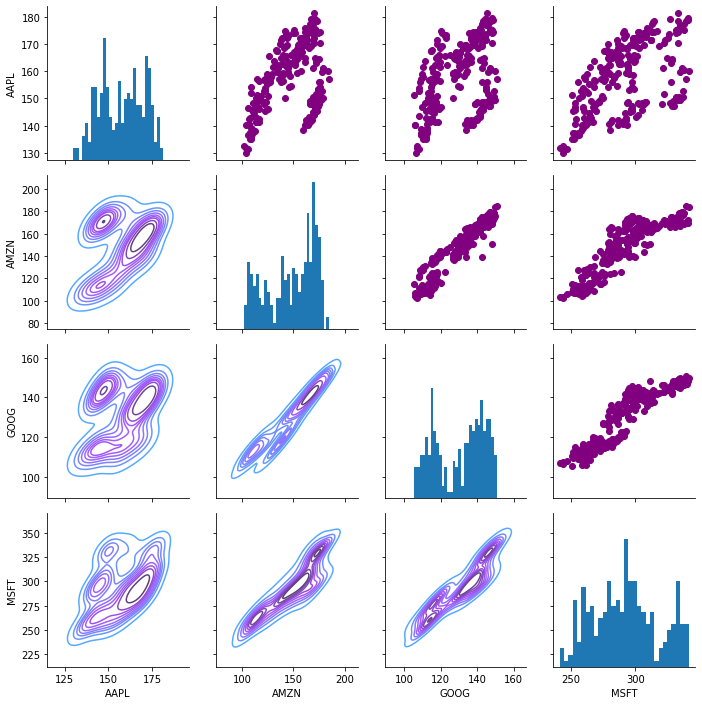

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')# Cmap = Color map

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)# Bins----> Are Towers or Bars

In [ ]:
'''

We completed the pair plot,
Now we use seabron for a quick correlation plot for the daily returns; By comparing the closing prices, we can see the relationship between the companies.

'''

'\n\nWe completed the pair plot,\nNow we use seabron for a quick correlation plot for the daily returns; By comparing the closing prices, we can see the relationship between the companies.\n\n'

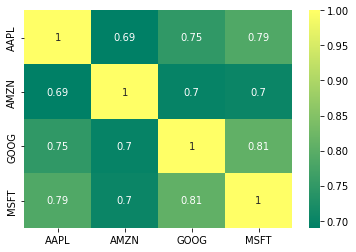

In [ ]:
# corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.
# here we use heatmap bcz it provides an excellent visual tool for comparing various entities.
# cmap – a matplotlib colormap name or object. This maps the data values to the color space.

# tech return
sns.heatmap(tech_return.corr(), annot=True, cmap='summer')

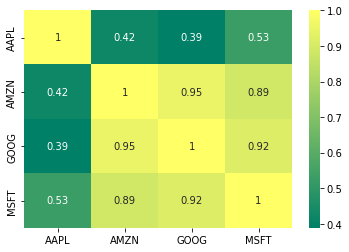

In [ ]:
# closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [ ]:
""" above we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return."""

' above we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return.'

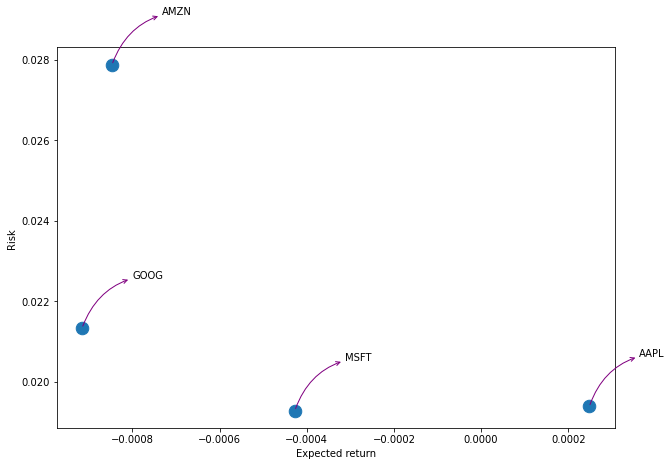

In [ ]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_returns DataFrame
rets = tech_return.dropna()

area = np.pi * 50


plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#ha - horizontal axis; va - vertical axis 
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 arrowprops=dict(arrowstyle='<-', color='purple', connectionstyle='arc3,rad=0.3' ))
    

    # ha='right', va='bottom' textcoords='offset points', 
    # textcoords - for fixing the enlarge image 
    # arrowprops = function for the creation and modifications of located line / arc 
    #connectionstyle for making the arc

In [ ]:
# Get the stock quote

df_apple = yf.download('AAPL', data_source='yahoo', start='2005-01-01', end=datetime.now())

#2012

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.964983,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.974894,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.983431,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.984194,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.055854,2227450400
...,...,...,...,...,...,...
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000
2022-08-30,162.130005,162.559998,157.720001,158.910004,158.910004,77906200
2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100


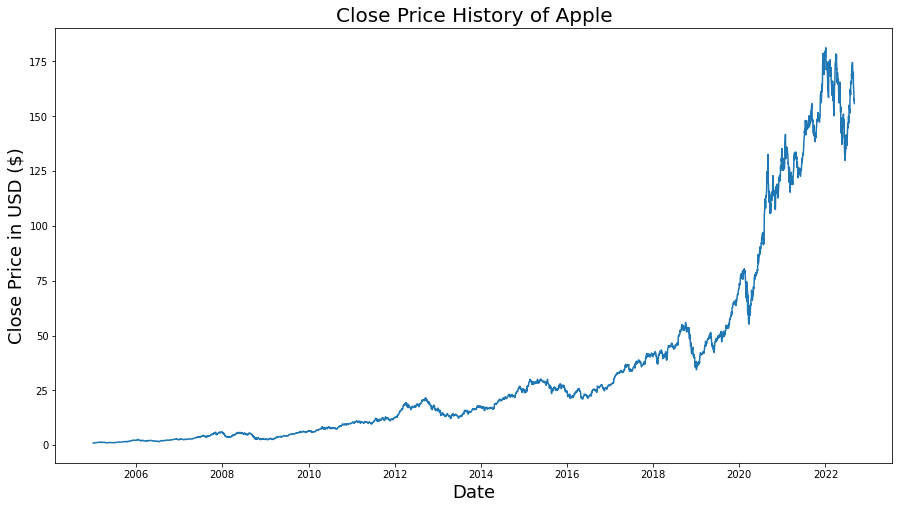

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_apple['Adj Close'])
plt.title('Close Price History of Apple', fontsize=20)
plt.xlabel('Date', fontsize=18 )
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()


In [ ]:
# Create a new dataframe with only the 'Close' value column 
data_close = df.filter(['Close'])

# Convert the dataframe to a numpy array
close_array = data_close.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(close_array) *  0.95 ))    # np.ceil(arr) --- return the next whole int value of a float num.
                                                   #.95
training_data_len

958

In [ ]:
# Scaling the data: scikit_learn is lib that includes classification, repression like libraries.
# The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.
from sklearn.preprocessing import MinMaxScaler

# scaling the closing dataset betwn 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_array)


In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# for i in range(10):
#   print(train_data[i])


# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
        
        
# Convert the x_train and y_train to numpy arrays 
x_train = np.array(x_train)
y_train= np.array(y_train)

print("Array BEFORE RESHAPE:\n",x_train)
print(f"***before Reshape, Shape of xtrain : {x_train.shape}***")

# print("Shape of xtrain : ", x_train.shape)
# print("Shape of ytrain : ", y_train.shape)

# Reshape the data
x_train = np.reshape( x_train, (x_train.shape[0], x_train.shape[1] , 1) )
print("\nArray AFTER RESHAPE:\n",x_train)
print(f"***After Reshape, Shape of xtrain : {x_train.shape}***")

# x_train.shape

Array BEFORE RESHAPE:
 [[0.21590535 0.2258306  0.21926913 ... 0.24763292 0.22632892 0.24057313]
 [0.2258306  0.21926913 0.21495022 ... 0.22632892 0.24057313 0.26158641]
 [0.21926913 0.21495022 0.19377079 ... 0.24057313 0.26158641 0.25938542]
 ...
 [0.25473219 0.25939993 0.27691237 ... 0.02225914 0.00560634 0.01623756]
 [0.25939993 0.27691237 0.27826    ... 0.00560634 0.01623756 0.0264535 ]
 [0.27691237 0.27826    0.26574336 ... 0.01623756 0.0264535  0.02757475]]
***before Reshape, Shape of xtrain : (898, 60)***

Array AFTER RESHAPE:
 [[[0.21590535]
  [0.2258306 ]
  [0.21926913]
  ...
  [0.24763292]
  [0.22632892]
  [0.24057313]]

 [[0.2258306 ]
  [0.21926913]
  [0.21495022]
  ...
  [0.22632892]
  [0.24057313]
  [0.26158641]]

 [[0.21926913]
  [0.21495022]
  [0.19377079]
  ...
  [0.24057313]
  [0.26158641]
  [0.25938542]]

 ...

 [[0.25473219]
  [0.25939993]
  [0.27691237]
  ...
  [0.02225914]
  [0.00560634]
  [0.01623756]]

 [[0.25939993]
  [0.27691237]
  [0.27826   ]
  ...
  [0.005606

In [ ]:
'''Keras is an open-source high-level Neural Network library, which is written in Python is capable enough to run on Theano, TensorFlow, or CNTK. 
   It was developed by one of the Google engineers, Francois Chollet. 
   It is made user-friendly, extensible, and modular for facilitating faster experimentation with deep neural networks. 
   It not only supports Convolutional Networks and Recurrent Networks individually but also their combination. 
   
   
   A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

   Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer.

   improved version oF RNN is LSTM.


   '''

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

898/898 [==============================] - 34s 34ms/step - loss: 0.0065


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = train_data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaled_data.inverse_transform(prediction)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

AttributeError: ignored

In [ ]:
# Plot the data
# data_close
# date 
train = data_close[:training_data_len]
valid = data_close[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

In [ ]:
''' TEMP0RARY BY ADITYA '''
# from pandas_datareader import data


# closing_df = data.DataReader(tech_list,'google', start, end)['Adj Close']
# closing_df.head()


In [ ]:
''' TEMP0RARY BY ADITYA '''

# import pandas_datareader.data as pdr

# for stocks in tech_list:
#     try:
#         closing_df = pdr.DataReader(stocks,'google', start, end)['Adj Close']
#         print(closing_df.head())
#     except:
#         print("Did not find: "+stocks)

